## Linear Regression with Python Scikit Learn¶
#### In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### Simple Linear Regression
#### In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### Author: Kausar Ali

In [26]:
import pandas as pd
import numpy as np
import seaborn as sn

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#Reading data from remote link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Students Hours and Scores Date: ")

df.head(10)

Students Hours and Scores Date: 


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Now checking Data for null values

In [ ]:
# Now checking Data for null values
df.info()

# Representation of Score

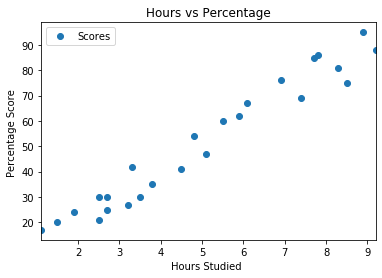

In [8]:
# Representation of Score
df.plot(x='Hours',y='Scores',style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied ')
plt.ylabel('Percentage Score ')
plt.show()

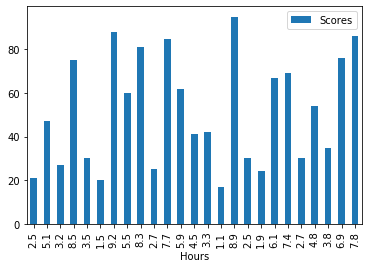

In [9]:
df.plot(x='Hours', y='Scores', kind="bar")
plt.show()

# Correlation between variables

In [10]:
# Correlation between variables
df.corr(method="pearson")

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [11]:
df.corr(method="spearman")

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


In [13]:
hours=df['Hours']
scores=df['Scores']

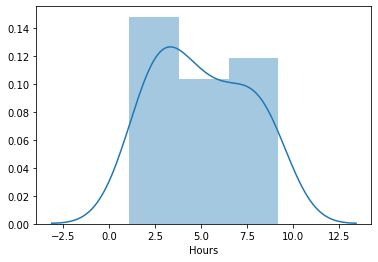

In [14]:
sn.distplot(hours)
plt.show()

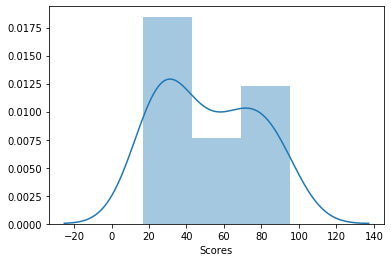

In [15]:
sn.distplot(scores)
plt.show()

# Preparing the data

In [16]:
# Preparing the data
#divide the data into "attributes" (inputs) and "Labels " (outputs)
X= df.iloc[:, :-1].values
y= df.iloc[:, 1].values

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Training the Algorithm

In [18]:
# Training the Algorithm
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print("Training complete. ")

Training complete. 


# Plotting the regression line

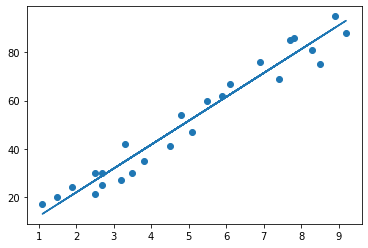

In [19]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X,y)
plt.plot(X, line)
plt.show()

# Making Predictions¶
#### Now that we have trained our algorithm, it's time to make some predictions

In [20]:
# Making predictions(Now its time to predict some data)
print(X_test)
y_pred = regressor.predict(X_test)


[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [21]:
# Comparision
# Actual vs predicted(comparision)
df = pd.DataFrame({'Actual' : y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


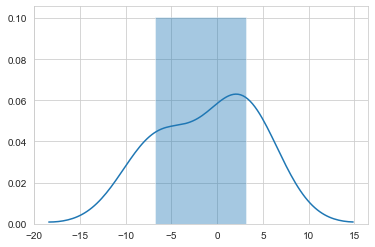

In [22]:
sn.set_style('whitegrid')
sn.distplot(y_test-y_pred)
plt.show()

In [23]:
# Lets test our own data/student study hours 9.25
hours = 9.25
scores = regressor.predict([[hours]])
print('if the student study for {} hours per day the student will score {}%'.format(hours,scores))

if the student study for 9.25 hours per day the student will score [93.69173249]%


# Evsluating the mode

In [25]:
# Evsluating the model
from sklearn import metrics
print('mean absolute Error: ',
     metrics.mean_absolute_error(y_test, y_pred))

mean absolute Error:  4.183859899002975
